# Esercizio: Planata

**Un aeroplanino di carta viene lanciato in orizzontale**

<center><img src="assets/paper-planes.jpg" width=65%/></center>

La posizione dell'aeroplano nel tempo può essere descritta da una curva parametrica:

$$
x(t) =
\left(\begin{array}{c}
x_0(t) \\
x_1(t)
\end{array}\right)
= 
\left(\begin{array}{c}
v_0 t \\
h_0 - \frac{1}{2} c g t^2 
\end{array}\right)
$$

* $t$ è il tempo (in secondi)
* $x_0(t)$ rappresenta la posizione dell'aeroplano sull'asse orizzontale
* $x_1(t)$ rappresenta la posizione dell'aeroplano sull'asse verticale
* $v_0$ è la velocità con cui l'aeroplano viene lanciato (in $m/s$)
* $h_0$ è l'altezza da cui l'aeroplano viene lanciato (in $m$)
* $g$ è l'accelerazione di gravità (in $m/s^2$)
* $c$ è un coefficiente che tiene conto dell'attrito (trascinamento) dell'aria

**Per prima cosa, si abiliti l'estensione autoreload di Jupyter**

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Nel modulo `sol.planata`, si definisca la funzione:**

```python
def posizione(t, v0=3.8, h0=2, g=9.80665, c=0.023)
```

* La funzione deve calcolare la posizione dell'aeroplano
* ...Ed in particolare restituire una tupla con i valori di $x_0(t)$ e $x_1(t)$
* Il codice di collaudo della funzione è già disponibile nella cella seguente
* Il codice disegna la traiettoria per un intervallo di 4 secondi

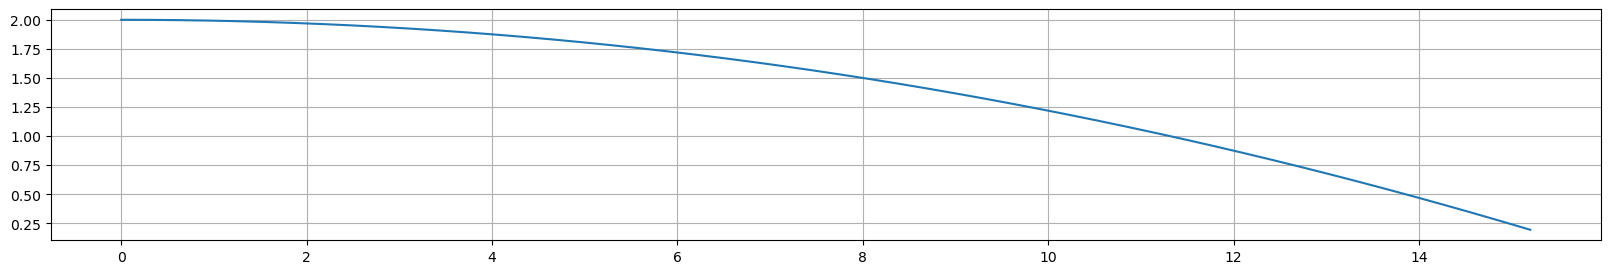

In [24]:
import numpy as np
from sol import planata
from matplotlib import pyplot as plt

t = np.linspace(0, 4)
x0, x1 = planata.posizione(t)
plt.figure(figsize=(20, 3))
plt.plot(x0, x1)
plt.grid()
plt.show()

**Vogliamo calcolare la lunghezza della traiettoria percorsa nell'intervallo $[t_0, t_f]$**

Per farlo, abbiamo bisogno di definire il vettore tangente (i.e. il vettore velocità), dato da:

$$
\dot{x}(t) =
\left(\begin{array}{c}
\dot{x}_0(t) \\
\dot{x}_1(t)
\end{array}\right)
= 
\left(\begin{array}{c}
v_0 t^0 \\
- c g t 
\end{array}\right)
$$

Potremo poi calcolare la lunghezza della curva integrando la lunghezza del vettore tangente:

$$
L = \int_{t_0}^{t_f} \|\dot{x}(t)\|_2 \, dt
$$

* Dove $\|\dot{x}(t)\|_2$ è la norma L2 del vettore tangente

Questo approccio è valido _per tutte le curve parametriche_. Procederemo per passi:

* Cominceremo introducendo una funzione (Python) per calcolare il vettore tangente
* Quindi introdurremo una funzione per calcolarne la lunghezza
* Infine potremo calcolare l'integrale

**Nel modulo `sol.planata`, si definisca per tale calcolo la funzione:**

```python
def velocita(t, v0=3.8, g=9.80665, c=0.023)
```

* La funzione deve calcolare le due componenti del vettore tangente
* ...Ed in particolare restituire una tupla con i valori di $\dot{x}_0(t)$ e $\dot{x}_1(t)$
* Il codice di collaudo della funzione è già disponibile nella cella seguente
* Il codice disegna i vettori tangente (per determinati valori di $t$) sotto forma di frecce

**ATTENZIONE:**

* Perché il codice funzioni, occorre che se `t` è un array di $n$ elementi
* ...Anche il risultato debba consistere di due array (uno per componente) con lo stesso numero di elementi
* Questo può causare problemi perché il termine `v0` è invece uno scalare
* Una possibile soluzione: per il calcolo della componente $\dot{x}_0(t)$, si utilizzi l'espressione $v_0 t^0$
* Se `t` è un array, il termine `t**0` corrisponde ad un array di "1"

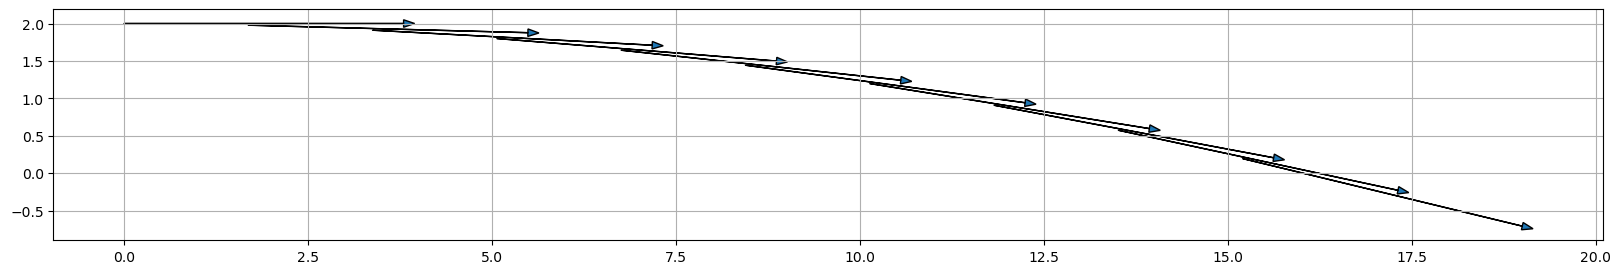

In [25]:
t = np.linspace(0, 4, 10)
x0, x1 = planata.posizione(t)
dx0, dx1 = planata.velocita(t)

plt.figure(figsize=(20, 3))
for v0, v1, dv0, dv1 in zip(x0, x1, dx0, dx1):
    plt.arrow(x=v0, y=v1, dx=dv0, dy=dv1, head_width=0.1)
plt.grid()
plt.show()

**Nel modulo `sol.planata`, si definisca la funzione:**

```python
def lvel(t, v0=3.8, g=9.80665, c=0.023)
```

La funzione deve calcolare la norma L2 del vettore velocità, data da:

$$
\|\dot{x}(t)\|_2 = \sqrt{\dot{x}_0(t)^2 + \dot{x}_1(t)^2}
$$

* Si noti che i valori di $\dot{x}_0(t)$ e $\dot{x}_1(t)$ possono essere ricavati semplicemente chiamando la funzione precedente
* Il codice di collaudo della funzione è già disponibile nella cella seguente
* Il codice disegna la lunghezza del vettore tangente nel tempo

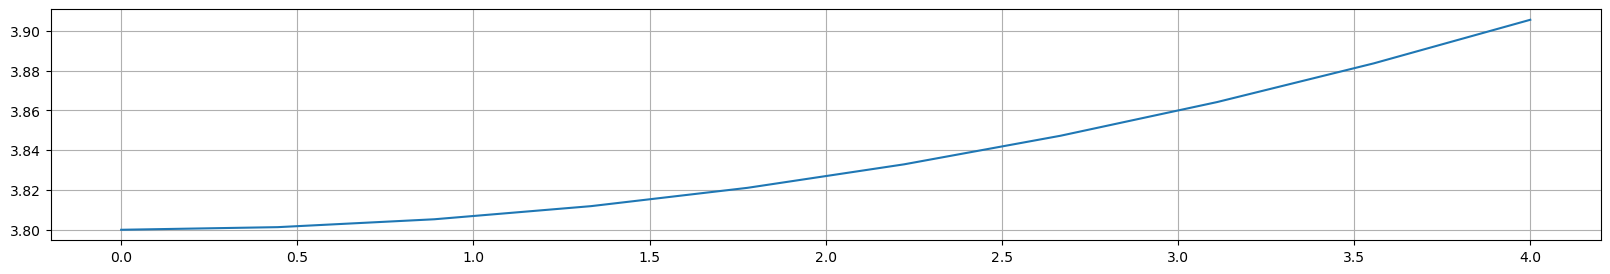

In [27]:
t = np.linspace(0, 4, 10)
lvel = planata.lvel(t)
plt.figure(figsize=(20, 3))
plt.plot(t, lvel)
plt.grid()
plt.show()

**Nel modulo `sol.planata`, si definisca la funzione:**

```python
def lunghezza(t0, t1)
```

La funzione deve calcolare la lunghezza della traiettoria percorsa nell'intevallo $[t_0, t_1]$, data da:

$$
L = \int_{t_0}^{t_1} \|\dot{x}(t)\|_2\, dt
$$

* Per l'integrazione, si utilizzi la funzione `scipy.integrate.quad` (non si resituisca il bound sull'errore)
* Si noti la funzione da integrare non è passata come parametro. Va invece usate `lvel`, ossia la funzione definita in precedenza
* Il codice di collaudo della funzione è già disponibile nella cella seguente

In [28]:
for t1 in np.linspace(0, 4, 6):
    L = planata.lunghezza(t0=0, t1=t1)
    print(f"Spazio percorso in {t1:.3f} secondi: {L:.3f} metri")

Spazio percorso in 0.000 secondi: 0.000 metri
Spazio percorso in 0.800 secondi: 3.041 metri
Spazio percorso in 1.600 secondi: 6.089 metri
Spazio percorso in 2.400 secondi: 9.151 metri
Spazio percorso in 3.200 secondi: 12.233 metri
Spazio percorso in 4.000 secondi: 15.342 metri
